In [618]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from einops import rearrange
from PIL import Image
import json
import time
from pathlib import Path
from sklearn import linear_model
import mediapy as media

In [619]:
!ls -lt baselines

total 5928
drwxr-xr-x 4 root root    8192 Jan 19 20:01 session_d3033abb
-rw-r--r-- 1 root root    2499 Jan 19 16:57 run_baseline_parallel.py
drwxr-xr-x 3 root root    4096 Jan 19 16:56 session_cf6cada6
drwxr-xr-x 2 root root      40 Jan 19 16:56 __pycache__
-rw-r--r-- 1 root root   18689 Jan 19 16:56 red_gym_env.py
drwxr-xr-x 5 root root    4096 Jan 19 16:36 session_9e05db65
drwxr-xr-x 4 root root    8192 Jan 19 16:09 session_a17cc1f5
drwxr-xr-x 5 root root    4096 Jan 19 06:39 session_ec3aa7dd
drwxr-xr-x 3 root root    4096 Jan 19 06:30 session_beb95a24
drwxr-xr-x 4 root root    8192 Jan 19 06:25 session_c6541997
drwxr-xr-x 4 root root    8192 Jan 19 05:00 session_e4bdca71
drwxr-xr-x 5 root root    4096 Jan 18 18:33 session_5ca3d910
drwxr-xr-x 4 root root    8192 Jan 18 16:40 session_eb21989e
drwxr-xr-x 4 root root    8192 Jan 18 06:31 session_f6162f41
drwxr-xr-x 4 root root    8192 Jan 18 01:36 session_55f28b25
drwxr-xr-x 3 root root    8192 Jan 18 00:24 session_280dfff7
drwxr-xr-x 3

In [620]:
def load_run_data(run_path):
    run_lists = []
    for p in Path(run_path).glob('all_runs_*.json'):
        with open(p, 'r') as f:
            run_lists.append(json.load(f))
    all_runs = [val for tup in zip(*run_lists) for val in tup]
    print(f'runs loaded: {len(all_runs)}')
    return all_runs

In [621]:
def plot_runs(
    all_runs, use_keys=None, 
    plot_fit=False, plot_line=False, 
    start=0, group_runs=1,
    agg_func=np.mean):
    
    all_runs = all_runs[start:]
    x = np.arange(len(all_runs)//group_runs)
    
    def add_plot(y, name, alpha, size, plot_line, plot_fit):
        plt.scatter(x, y, alpha=alpha, s=size, label=name)
        if plot_line:
            plt.plot(x, y, alpha=alpha, label=name)
        if plot_fit:
            regr = linear_model.LinearRegression()
            # Optimize linear model
            regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

            # Make predictions using the testing set
            lin_y = regr.predict(x.reshape(-1, 1))
            plt.plot(x, lin_y, linewidth=3)
    
    # convert list of dictionaries to dictionary of lists
    metrics = {m: [run[m] for run in all_runs] for m in all_runs[0].keys()}
    metrics['total'] = [sum([v for _,v in run.items()]) for run in all_runs]
    if group_runs:
        for m, dat in metrics.items():
            metrics[m] = agg_func(np.array(dat).reshape(-1, group_runs), 1)
    available_keys = metrics.keys()
    print(f'available metrics: {list(available_keys)}')
    if use_keys is None:
        use_keys = available_keys
    
    ## TODO subplot for each metric ## 
    NUM_COLORS = len(use_keys)
    cm = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    for i, m in enumerate(use_keys):
        add_plot(
            np.array(metrics[m]), m, 1.0, 4.0, plot_line, plot_fit
        )

    plt.title('Reward over runs PPO')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    plt.show()

In [622]:
def get_latest_grid(pth):
    imgs = np.array([np.array(Image.open(p)) for p in Path(pth).glob('curframe*.jpeg')])
    grid = rearrange(imgs, '(h2 w2) h w c -> (h2 h) (w2 w) c', w2=4)
    return grid

In [623]:
'''
get_im_func = lambda: get_latest_grid('baselines/session_d34118d3')

with media.VideoWriter('test_grid.mp4', get_im_func().shape[:2]) as wr:
    for i in range(500):
        #wr.add_image(get_im_func())
        #time.sleep(1)
'''        

"\nget_im_func = lambda: get_latest_grid('baselines/session_d34118d3')\n\nwith media.VideoWriter('test_grid.mp4', get_im_func().shape[:2]) as wr:\n    for i in range(500):\n        #wr.add_image(get_im_func())\n        #time.sleep(1)\n"

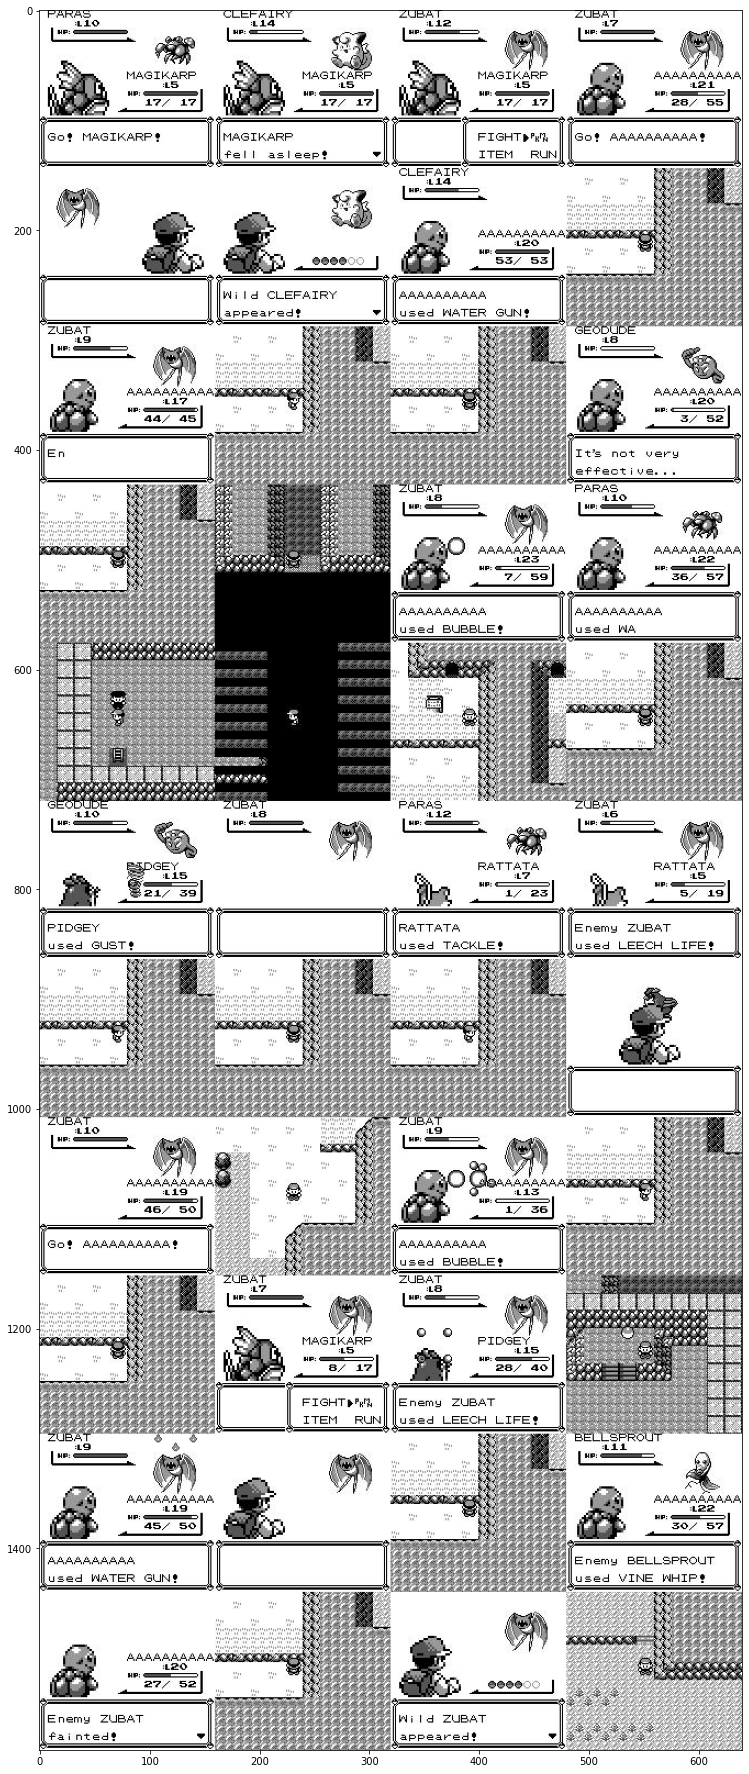

In [1173]:
plt.figure(figsize = (32, 32))
plt.imshow(get_latest_grid('baselines/session_b30478f4_mt_moon'))

runs loaded: 8668
available metrics: ['event', 'level', 'heal', 'op_lvl', 'dead', 'badge', 'explore', 'total']


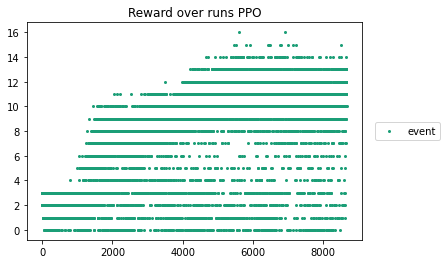

In [1182]:
plot_runs(
    load_run_data('baselines/session_b30478f4_mt_moon'),
    use_keys=['event'],
    plot_line=False,
    plot_fit=False,
    start=44*0,
    group_runs=1,
    agg_func=np.mean
)

In [791]:
max([run['levels'] for run in load_run_data('baselines/session_80f70ab4')])

runs loaded: 10112


22.6

runs loaded: 10128
available metrics: ['levels', 'explore', 'total']


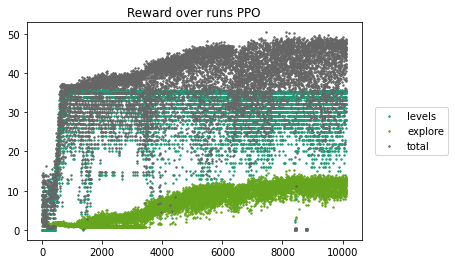

In [392]:
plot_runs(
    load_run_data('baselines/session_3e341821'),
    use_keys=None,
    plot_line=False,
    plot_fit=False,
    start=0,
    group_runs=1,
    agg_func=np.mean
)

runs loaded: 5040
available metrics: ['levels', 'explore', 'total']


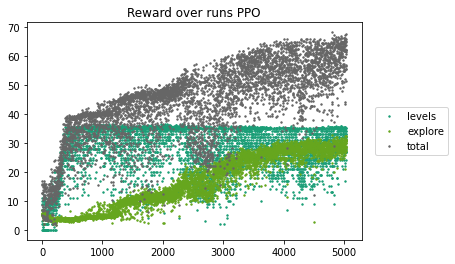

In [349]:
plot_runs(
    load_run_data('baselines/session_812437f3_3k_explore'),
    use_keys=None,
    plot_line=False,
    plot_fit=False,
    start=0,
    group_runs=1,
    agg_func=np.mean
)

runs loaded: 4608
available metrics: ['levels', 'explore', 'total']


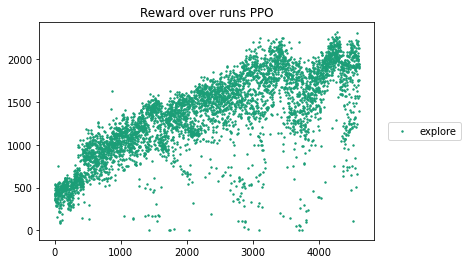

In [93]:

plot_runs(
    load_run_data('baselines/session_82b536f8_makes_it_to_gym'),
    use_keys=['explore'],
    plot_line=False,
    plot_fit=False,
    start=0,
    group_runs=1,
    agg_func=np.mean
)


runs loaded: 6336
available metrics: ['levels', 'explore', 'total']


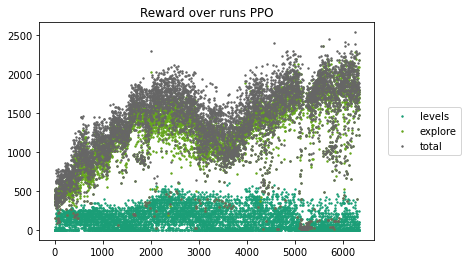

In [123]:

plot_runs(
    load_run_data('baselines/session_bad50734'),
    use_keys=None,
    plot_line=False,
    plot_fit=False,
    start=0,
    group_runs=1,
    agg_func=np.mean
)
